# Other photo manipulations (working)

## Import class definitions

In [2]:
from pointillism import pointillize, pointillizeStack, pointillizePile
%run pointillism.py

## Sobel

In [3]:
# Create instance on directory or filename
point = pointillize(location='images/IMG_3197.jpg', debug = True, border = 0)

# Crop
point.crop_Y([1000,500], True)

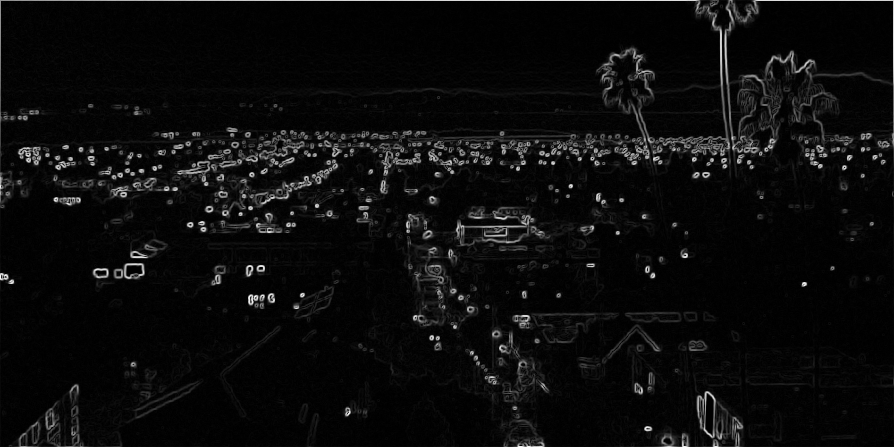

In [4]:
from scipy import ndimage
im = point.array[:,:,0].copy()
sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)
Image.fromarray((sob/sob.max()*255).astype('uint8'))

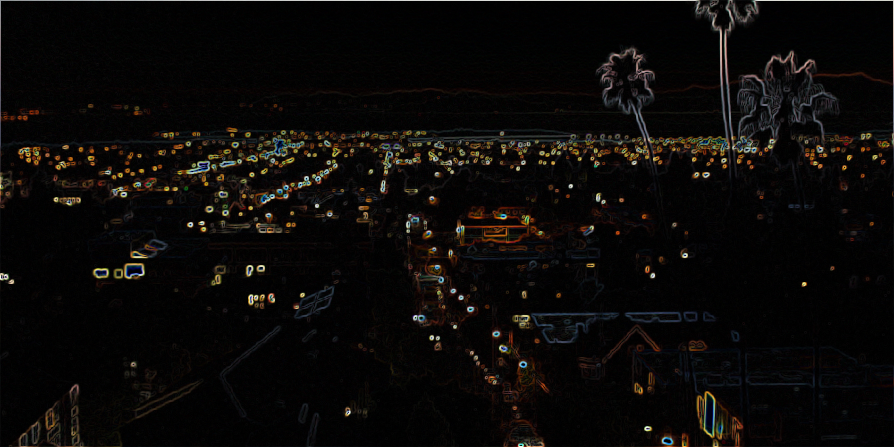

In [5]:
from scipy import ndimage
array_list = []
for color in range(0,3):
    im = point.array[:,:,color].copy()
    sx = ndimage.sobel(im, axis=0, mode='constant')
    sy = ndimage.sobel(im, axis=1, mode='constant')
    sob = np.hypot(sx, sy)
    array_list.append(sob)
stacked = np.dstack(array_list)
Image.fromarray((stacked/stacked.max()*255).astype('uint8'))

## Guassian

In [6]:
# Create instance on directory or filename
point = pointillize(location='images/IMG_0368.jpg', debug = True, border = 0)

# Crop
point.crop_Y([1000,500], False)

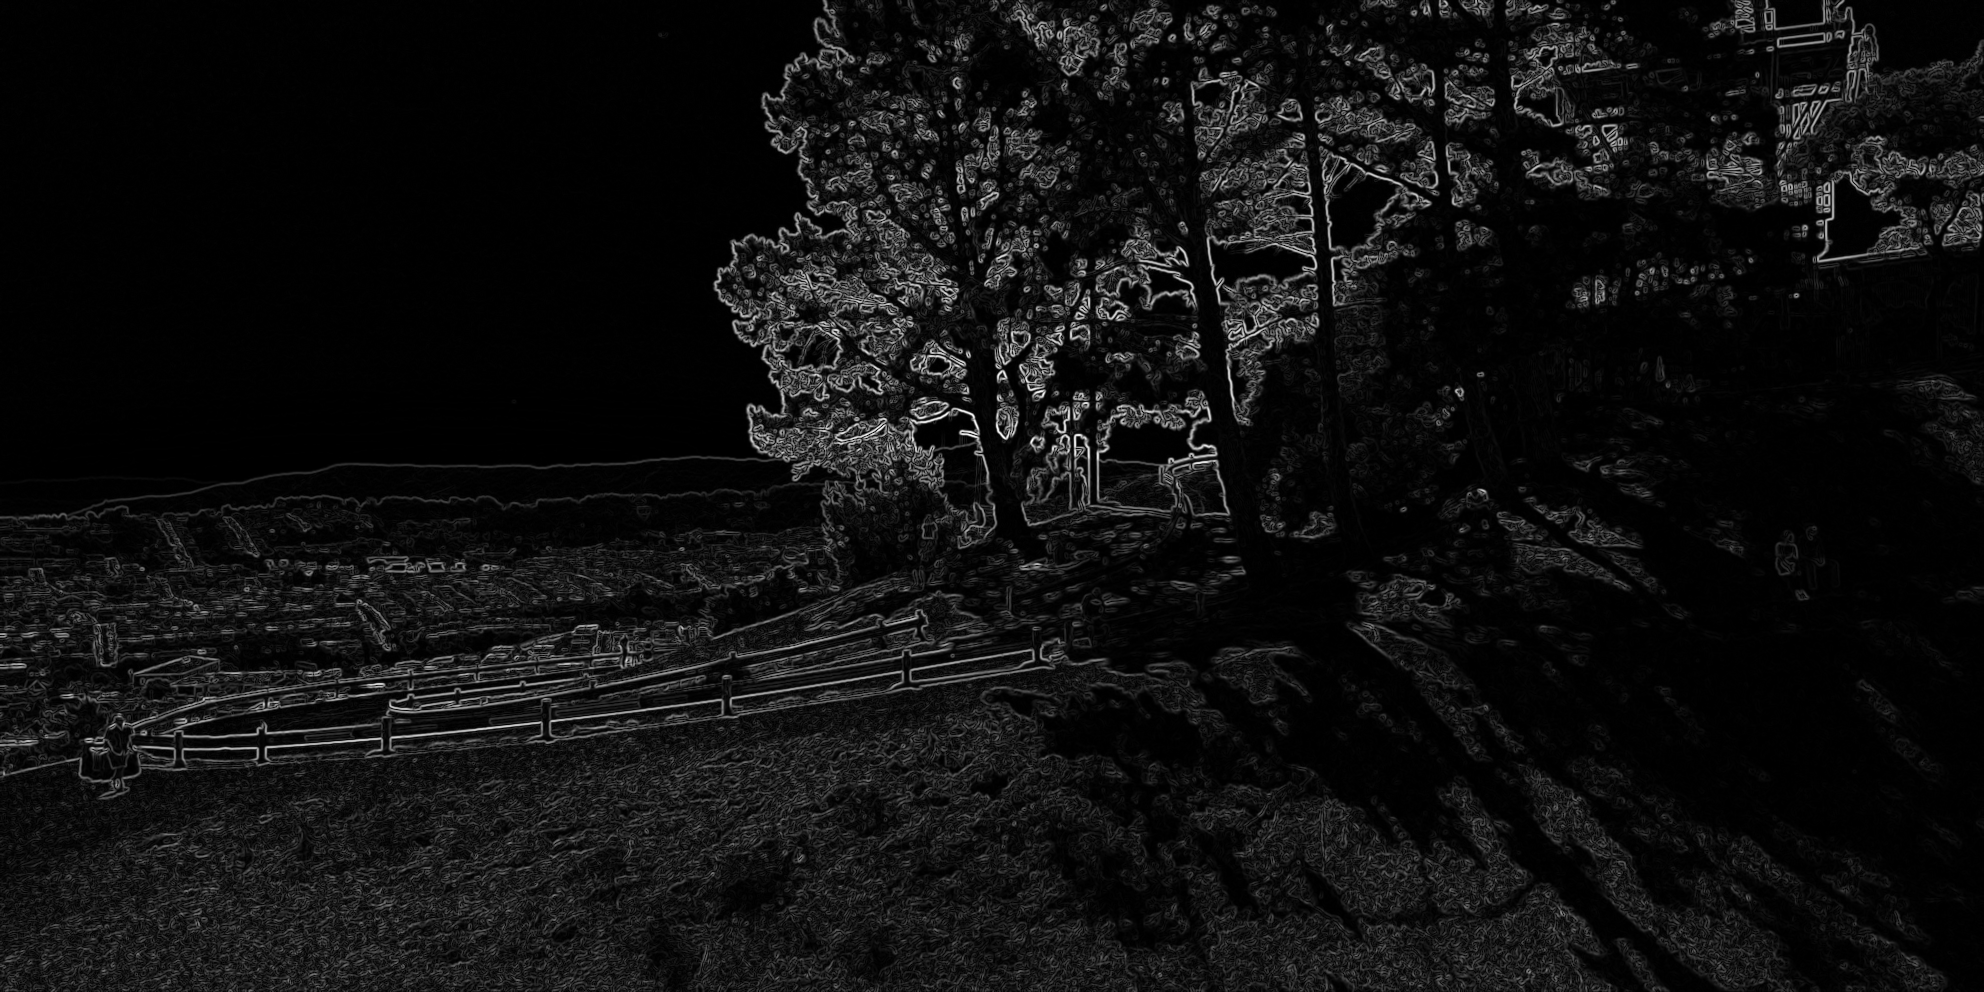

In [7]:
im = point.array.sum(axis=2).copy()
sob = ndimage.gaussian_gradient_magnitude(im, sigma=1)
Image.fromarray((sob/sob.max()*255).astype('uint8'))

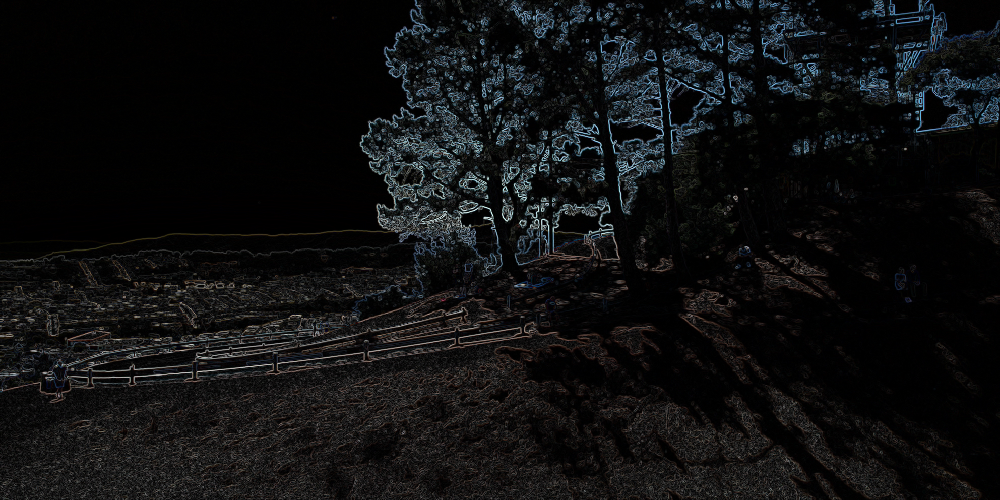

In [8]:
from scipy import ndimage
array_list = []
for color in range(0,3):
    im = point.array[:,:,color].copy()
    sob = ndimage.gaussian_gradient_magnitude(im, sigma=1)
    array_list.append(sob)
stacked = np.dstack(array_list)
Image.fromarray((stacked/stacked.max()*255).astype('uint8')).resize((1000,500))

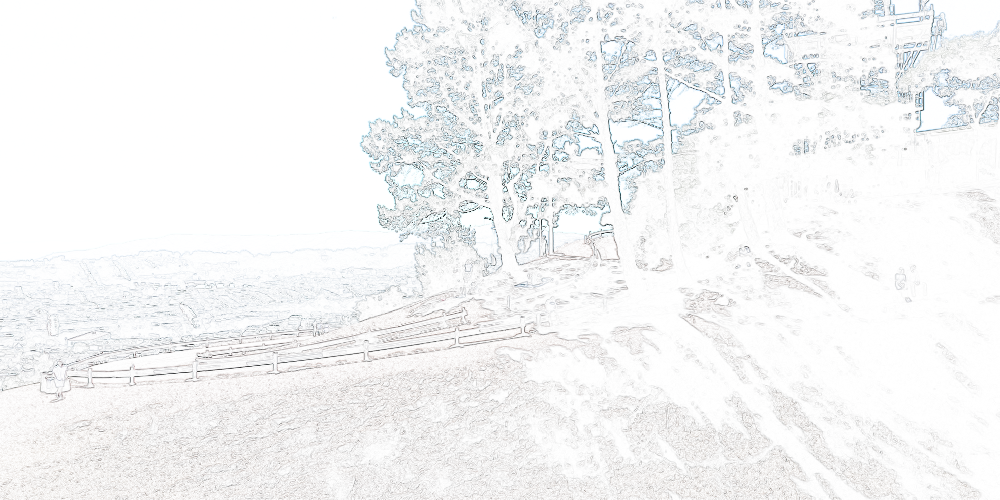

In [9]:
im = point.array.sum(axis=2).copy()
sob = ndimage.gaussian_gradient_magnitude(im, sigma=1)
image = point.image.copy()
out = Image.fromarray((sob/sob.max()*255).astype('uint8'))
out = out.resize(image.size)
image.putalpha(out)
white = Image.new(size=image.size, color=(255,255,255), mode='RGB')
white.paste(image, (0,0), image)
#white.save('etc/DJI_borders.jpg')
white.resize((1000,500))

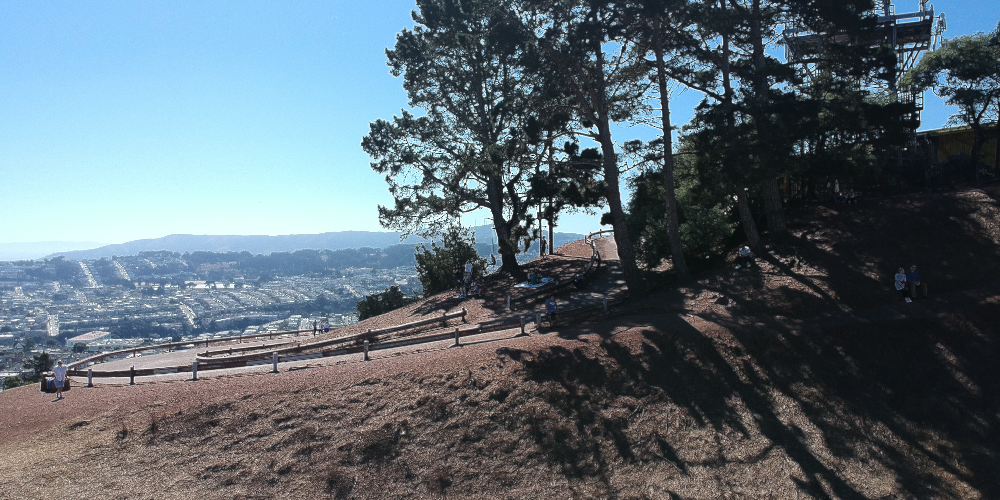

In [10]:
from PIL import ImageOps
im = point.array.sum(axis=2).copy()
sob = ndimage.gaussian_gradient_magnitude(im, sigma=1)
image = point.image.copy()
out = Image.fromarray((sob/sob.max()*255).astype('uint8'))
out = ImageOps.invert(out)
out = out.resize(image.size)
image.putalpha(out)
white = Image.new(size=image.size, color=(255,255,255), mode='RGB')
white.paste(image, (0,0), image)
#white.save('etc/DJI_noborders.jpg')
white.resize((1000,500))
